In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

df = pd.read_csv('def.csv', encoding = 'cp949')

data.head()

,all,user
0,25.0,48.0
1,6.8,41.4
2,1.3,37.4
3,7.4,26.6
4,14.9,25.9


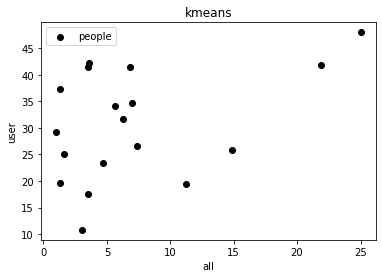

In [18]:
X = df.iloc[:, [0, 1]].values 
m=X.shape[0] 
n=X.shape[1] 

plt.scatter(X[:,0],X[:,1],c='black',label='people')
plt.xlabel('all')
plt.ylabel('user')
plt.legend()
plt.title('kmeans')
plt.show()

In [19]:
K=3
n_iter=100
Centroids=np.array([]).reshape(n,0)
Centroids 


array([], shape=(2, 0), dtype=float64)

In [20]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

array([[ 5.6,  1. ,  1. ],
       [34.1, 29.3, 29.3]])

In [21]:
Output={}

In [22]:
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance 

array([], shape=(18, 0), dtype=float64)

In [23]:
Centroids[:,0] # shape=(2,)

array([ 5.6, 34.1])

In [26]:
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist

array([569.57,  54.73,  29.38,  59.49, 153.73, 115.3 ,  97.  ,  71.24,
         2.32, 326.53,   0.  ,  44.2 , 549.65, 247.45, 279.97, 225.85,
        57.7 ,   6.74])

In [27]:
np.c_[EuclidianDistance,tempDist]

array([[569.57],
       [ 54.73],
       [ 29.38],
       [ 59.49],
       [153.73],
       [115.3 ],
       [ 97.  ],
       [ 71.24],
       [  2.32],
       [326.53],
       [  0.  ],
       [ 44.2 ],
       [549.65],
       [247.45],
       [279.97],
       [225.85],
       [ 57.7 ],
       [  6.74]])

In [28]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance

array([[569.57, 925.69, 925.69],
       [ 54.73, 180.05, 180.05],
       [ 29.38,  65.7 ,  65.7 ],
       [ 59.49,  48.25,  48.25],
       [153.73, 204.77, 204.77],
       [115.3 ,  48.5 ,  48.5 ],
       [ 97.  ,  18.  ,  18.  ],
       [ 71.24, 175.76, 175.76],
       [  2.32,  65.16,  65.16],
       [326.53, 595.57, 595.57],
       [  0.  ,  44.2 ,  44.2 ],
       [ 44.2 ,   0.  ,   0.  ],
       [549.65, 346.25, 346.25],
       [247.45, 202.05, 202.05],
       [279.97, 145.49, 145.49],
       [225.85,  92.25,  92.25],
       [ 57.7 , 152.66, 152.66],
       [  6.74,  33.38,  33.38]])

In [29]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [30]:
# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C 

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

In [31]:
Y={}
for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64)}

In [32]:
# 출력값 임시 딕셔너리 갱신
Y[C[0]]=np.c_[Y[C[0]],X[0]] # C[0] 키 값에 대한 재귀적 갱신
Y[C[0]]

array([[25.],
       [48.]])

In [33]:
for i in range(m): # m=22
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[25. , 25. ,  6.8,  1.3, 14.9,  3.6,  7. , 21.9,  5.6,  3.5,  6.3],
        [48. , 48. , 41.4, 37.4, 25.9, 42.3, 34.7, 41.9, 34.1, 41.4, 31.6]]),
 2: array([[ 7.4,  4.7,  1.6,  1. ,  3. , 11.2,  3.5,  1.3],
        [26.6, 23.4, 25.1, 29.3, 10.8, 19.4, 17.5, 19.7]]),
 3: array([], shape=(2, 0), dtype=float64)}

In [34]:
Y[1]

array([[25. , 25. ,  6.8,  1.3, 14.9,  3.6,  7. , 21.9,  5.6,  3.5,  6.3],
       [48. , 48. , 41.4, 37.4, 25.9, 42.3, 34.7, 41.9, 34.1, 41.4, 31.6]])

In [35]:
Y[1].T

array([[25. , 48. ],
       [25. , 48. ],
       [ 6.8, 41.4],
       [ 1.3, 37.4],
       [14.9, 25.9],
       [ 3.6, 42.3],
       [ 7. , 34.7],
       [21.9, 41.9],
       [ 5.6, 34.1],
       [ 3.5, 41.4],
       [ 6.3, 31.6]])

In [42]:
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[25. , 48. ],
        [25. , 48. ],
        [ 6.8, 41.4],
        [ 1.3, 37.4],
        [14.9, 25.9],
        [ 3.6, 42.3],
        [ 7. , 34.7],
        [21.9, 41.9],
        [ 5.6, 34.1],
        [ 3.5, 41.4],
        [ 6.3, 31.6]]),
 2: array([[ 7.4, 26.6],
        [ 4.7, 23.4],
        [ 1.6, 25.1],
        [ 1. , 29.3],
        [ 3. , 10.8],
        [11.2, 19.4],
        [ 3.5, 17.5],
        [ 1.3, 19.7]]),
 3: array([], shape=(0, 2), dtype=float64)}

In [47]:
for k in range(K): 
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Centroids
#nan 값 해결 못함

array([[10.99090909,  4.2125    ,         nan],
       [38.79090909, 21.475     ,         nan]])

In [ ]:
#nan 값 해결 못함
'''
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('all')
plt.ylabel('user')
plt.legend()
plt.show()
'''

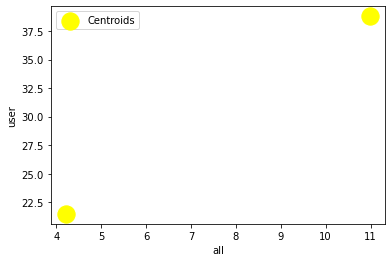

In [53]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('all')
plt.ylabel('user')
plt.legend()
plt.show()